<h2 style="font-weight: 700; text-align: center">Best First Search (BeFS) for Graph Node Search</h2>

<h4> Graph Reference </h4><span style="font-size: 14px">[Graph 1 is represented in the Cartesian system as accurately as possible (more information about the problem unlocked Best First Search)]</span><p style="font-weight: bold; color: chartreuse; font-size: 12px"> Cartesian Graph creation tool, Geogebra: <a>https://www.geogebra.org/m/VWN3g9rE</a></p>

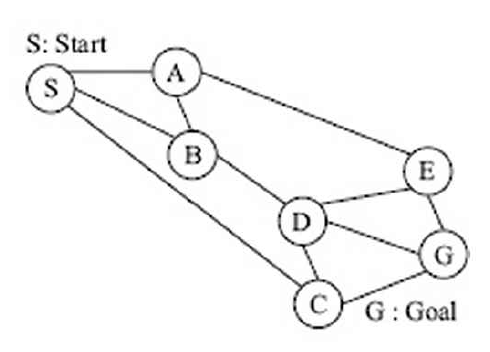

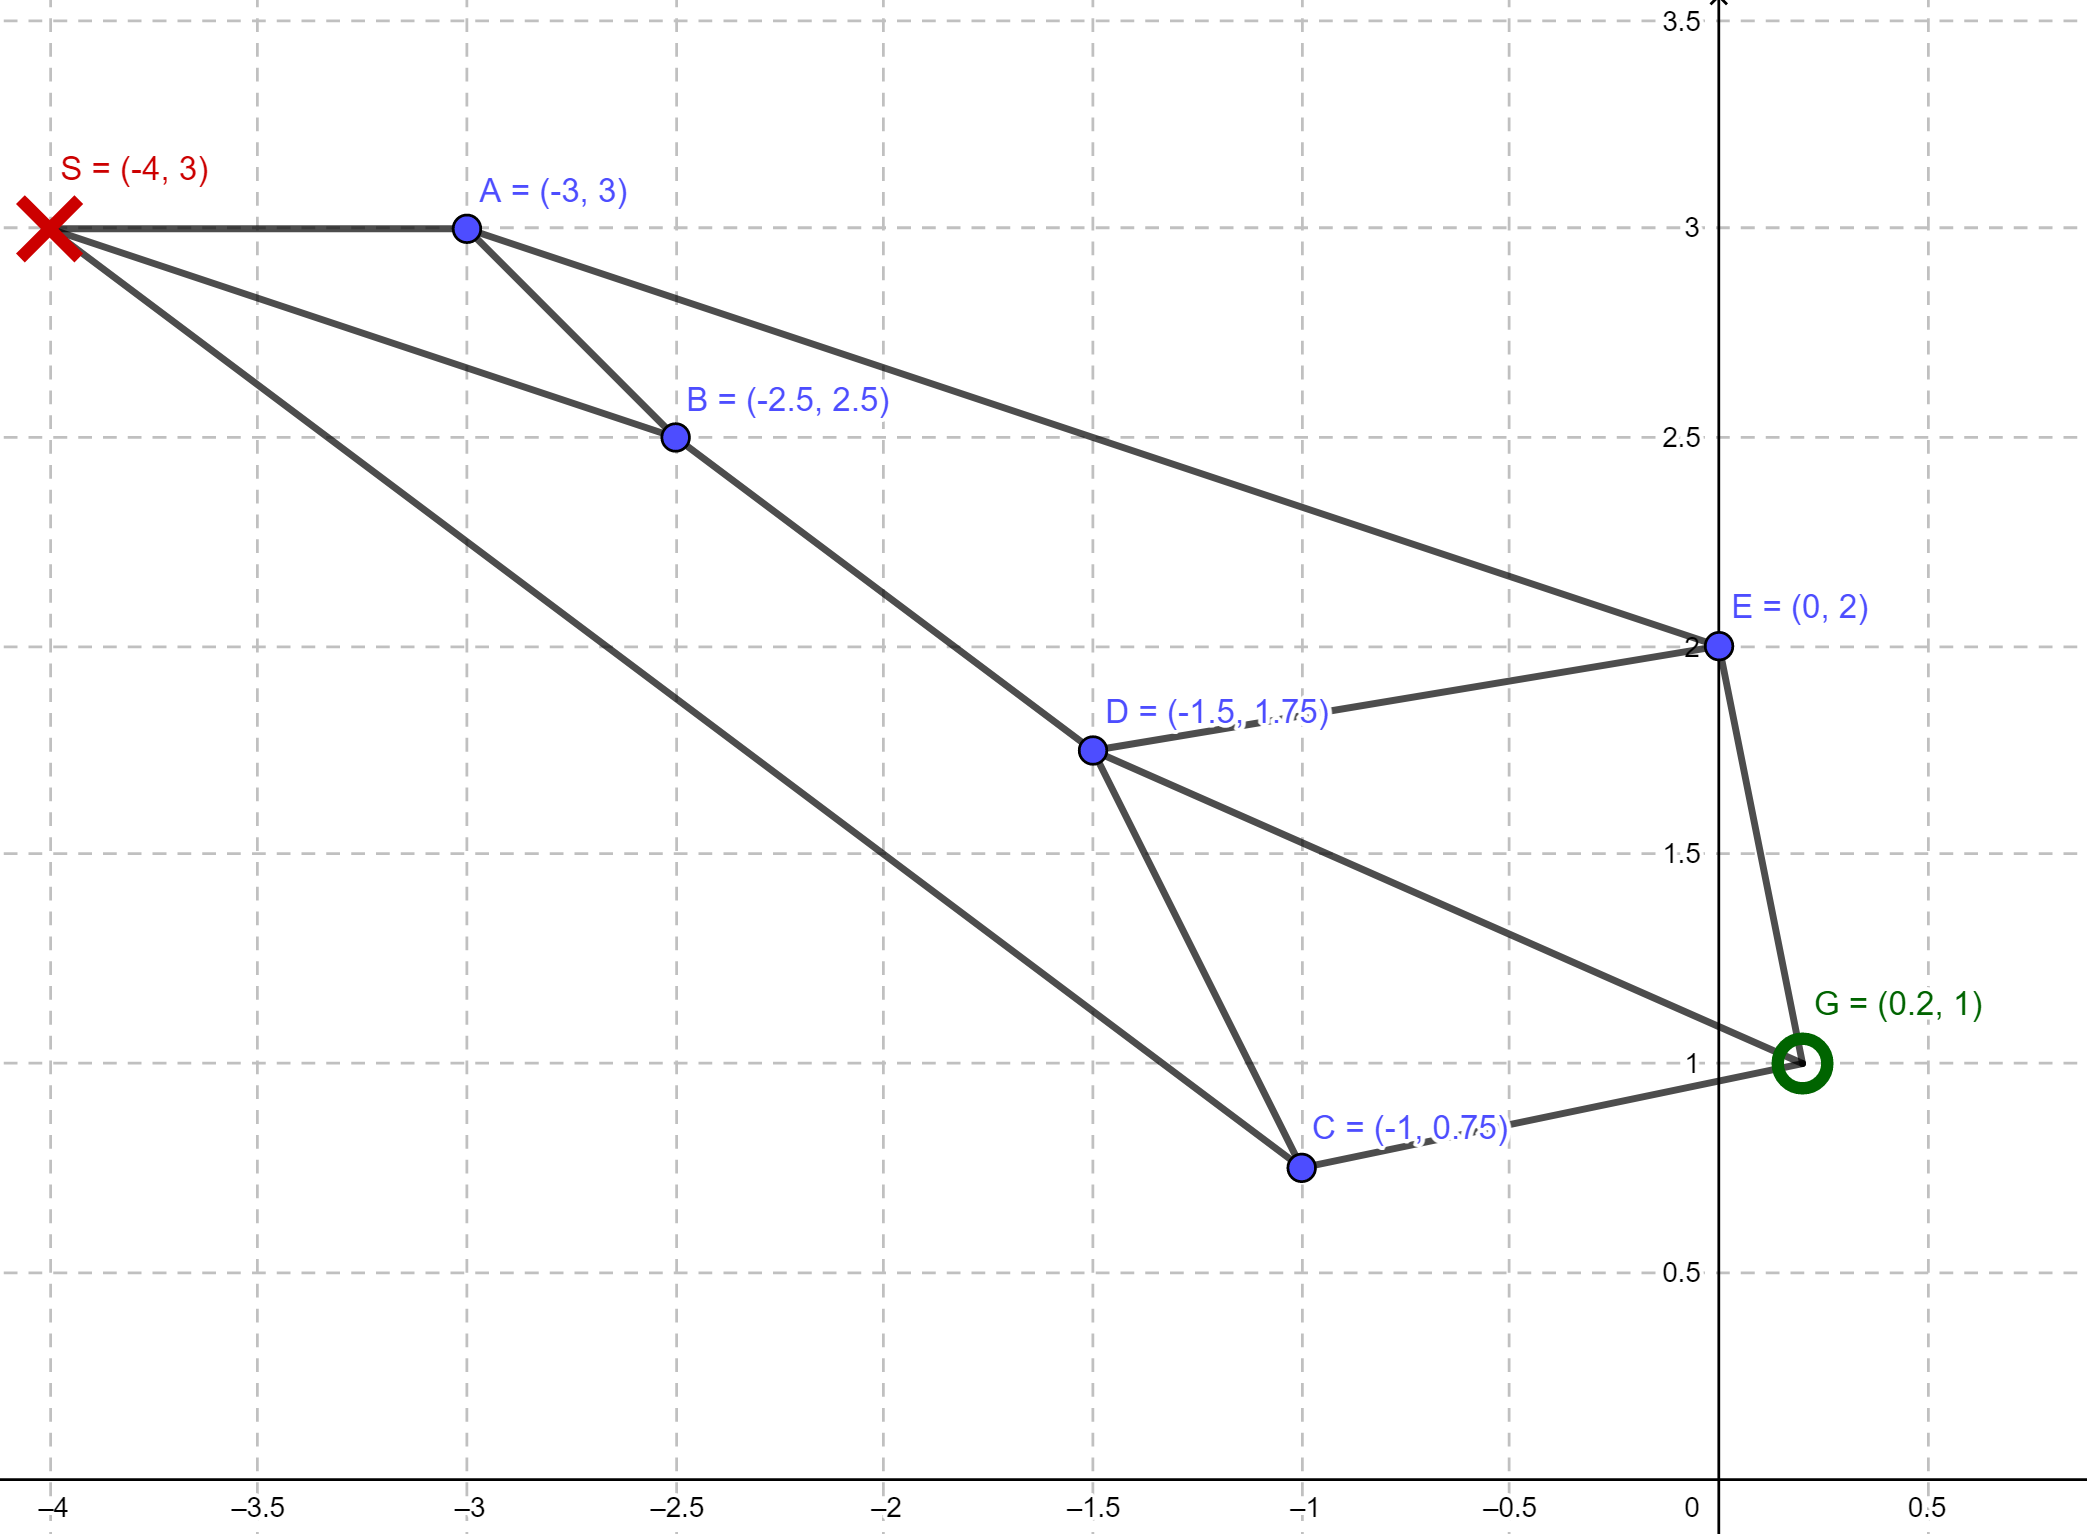

In [54]:
from IPython.display import Image, display
I1 = Image(filename="../../Graphs/Graph_1_ref.png", width=275, height=200)
I2 = Image(filename="../../Graphs/Graph_1_ggb_ref.png", width=800, height=400)
display(I1, I2)

#### Graph Representation (More Informed)

In [55]:

#~ An unweighed undirected graph represented as a hashmap/dictionary of Parent node (key) and connected children and the co-ordinate of the parent node
graph = { "S": [["A", "B", "C"], (-4, 3)],
          "A": [["B", "E", "S"], (-3, 3)],
          "B": [["A", "D", "S"], (-2.5, 2.5)],
          "C": [["D", "G", "S"], (-1, 0.75)],
          "D": [["B", "C", "E", "G"], (-1.5, 1.75)],
          "E": [["A", "D", "G"], (0, 2)],
          "G": [["C", "D", "E"], (0.2, 1)],
        }

<p style="font-size: 16px"><b>The Heuristic (Approximate Dist. - Straight Line Dist. - Euclidean Dist.) Function</b> --> Distance of the node from the Goal </p>

In [56]:
def calc_heuristic(from_coords, to_coords):
  return ((from_coords[0] - to_coords[0]) ** 2 + (from_coords[1] - to_coords[1]) ** 2) ** 0.5

<p style="font-size: 16px"><b>Primary data structures (OPEN and CLOSED) will work on <u>(child, parent, heuristic of child)</u> tuples</b></p>

In [57]:
def make_pair(to_, from_, heuristic):
  return (to_, from_, heuristic)

<p style="font-size: 16px"><b>MoveGen</b> -> Generates new nodes and moves the process of searching forward</p>

In [58]:
def befs_move_gen(graph, parent, goal):
  new_nodes = [make_pair(new, parent, calc_heuristic(graph[new][1], graph[goal][1])) for new in graph[parent][0]]     
  return new_nodes

<p style="font-size: 16px"><b>Remove seen Function</b></p>

###### Remove_seen checks *both* the *CLOSED* and *OPEN* lists in DFS and so it does in BeFS

In [59]:
def befs_remove_seen(new_nodes, OPEN, CLOSED):
  cleansed = []
  OPEN_ = [n[0] for n in OPEN]        # only the children, not the whole pair 
  CLOSED_ = [n[0] for n in CLOSED]
  for node in new_nodes:
    if node[0] not in OPEN_ and node[0] not in CLOSED_:   # if and only if the new node is not already in OPEN and CLOSED, add it
      cleansed.append(node)
  return cleansed

<p style="font-size: 16px"><b>Reconstruct path</b> -> When Goal node is found, this functions returns the exact path taken to reach to it</p>

In [60]:
def reconstruct_path(OPEN, CLOSED):
  path = [OPEN.pop(0)]
  node = path[0]

  while node[1] != "NIL":
    for m in CLOSED:
      if node[1] == m[0]:
        path.append(m)
        node = m
  return path

<p style="font-size: 16px"><b>Print path</b> -> Utility function to print the final path prettily</p>

In [61]:
def print_path(path):
  for node_ix in range(len(path)):
    if node_ix != len(path) - 1:
      print(f"\033[38;5;214m{path[node_ix][0]}", end="\033[38;5;207m -> \033[0m")
    else:  
      print(f"\033[38;5;214m{path[node_ix][0]}")

<p style="font-size: 20px"><b>Core working function</b></p>

In [62]:
def graph_befs(graph, start, goal):
  CLOSED = []
  try:
    OPEN = [make_pair(start, "NIL", calc_heuristic(graph[start][1], graph[goal][1]))]
  except KeyError:
    print("\033[38;5;197mNode doesn't exist, cannot calculate distance!\033[0m")
    return
  
  while len(OPEN) != 0:
    print("OPEN: ", OPEN)
    if OPEN[0][0] == goal:
      print("Path from Source to Goal:", end=" ")
      print_path(reconstruct_path(OPEN, CLOSED)[::-1])
      return
    else:
      CLOSED.append(OPEN.pop(0))
      new_nodes = befs_move_gen(graph, CLOSED[-1][0], goal)
      # print(new_nodes)
      new_nodes = befs_remove_seen(new_nodes, OPEN, CLOSED)
      [OPEN.insert(0, i) for i in new_nodes]        
      OPEN.sort(key = lambda x: x[2]) # "Priority queue(Sorted List) implementation in BeFS"
  print("\033[38;5;197mGoal not found...\033[0m")

<p style="font-size: 20px">Function Calls</p>

<p style="font-size: 20px"><b>For the graph set above ↑</b></p>

<p style="font-size: 16px">Case 1: Simple <b>Start (S)</b> to <b>Goal (G)</b> searching</p>

In [63]:
graph_befs(graph, "S", "G")

OPEN:  [('S', 'NIL', 4.651881339845203)]
OPEN:  [('C', 'S', 1.2257650672131262), ('B', 'S', 3.0886890422961004), ('A', 'S', 3.773592452822642)]
OPEN:  [('G', 'C', 0.0), ('D', 'C', 1.8580904176062045), ('B', 'S', 3.0886890422961004), ('A', 'S', 3.773592452822642)]
Path from Source to Goal: S -> C -> G


<p style="font-size: 16px">Case 2: Goal is not present</p>

In [64]:
graph_befs(graph, "A", "H")

Node doesn't exist, cannot calculate distance!


<p style="font-size: 16px">Case 3: Begins with Goal itself</p>

In [65]:
graph_befs(graph, "G", "G")

OPEN:  [('G', 'NIL', 0.0)]
Path from Source to Goal: G


<p style="font-weight: 700; font-size: 20px">Beeg Graph - 1</p>

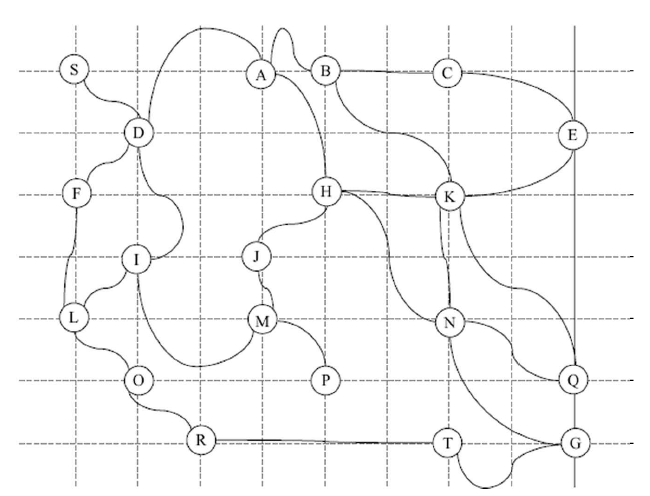

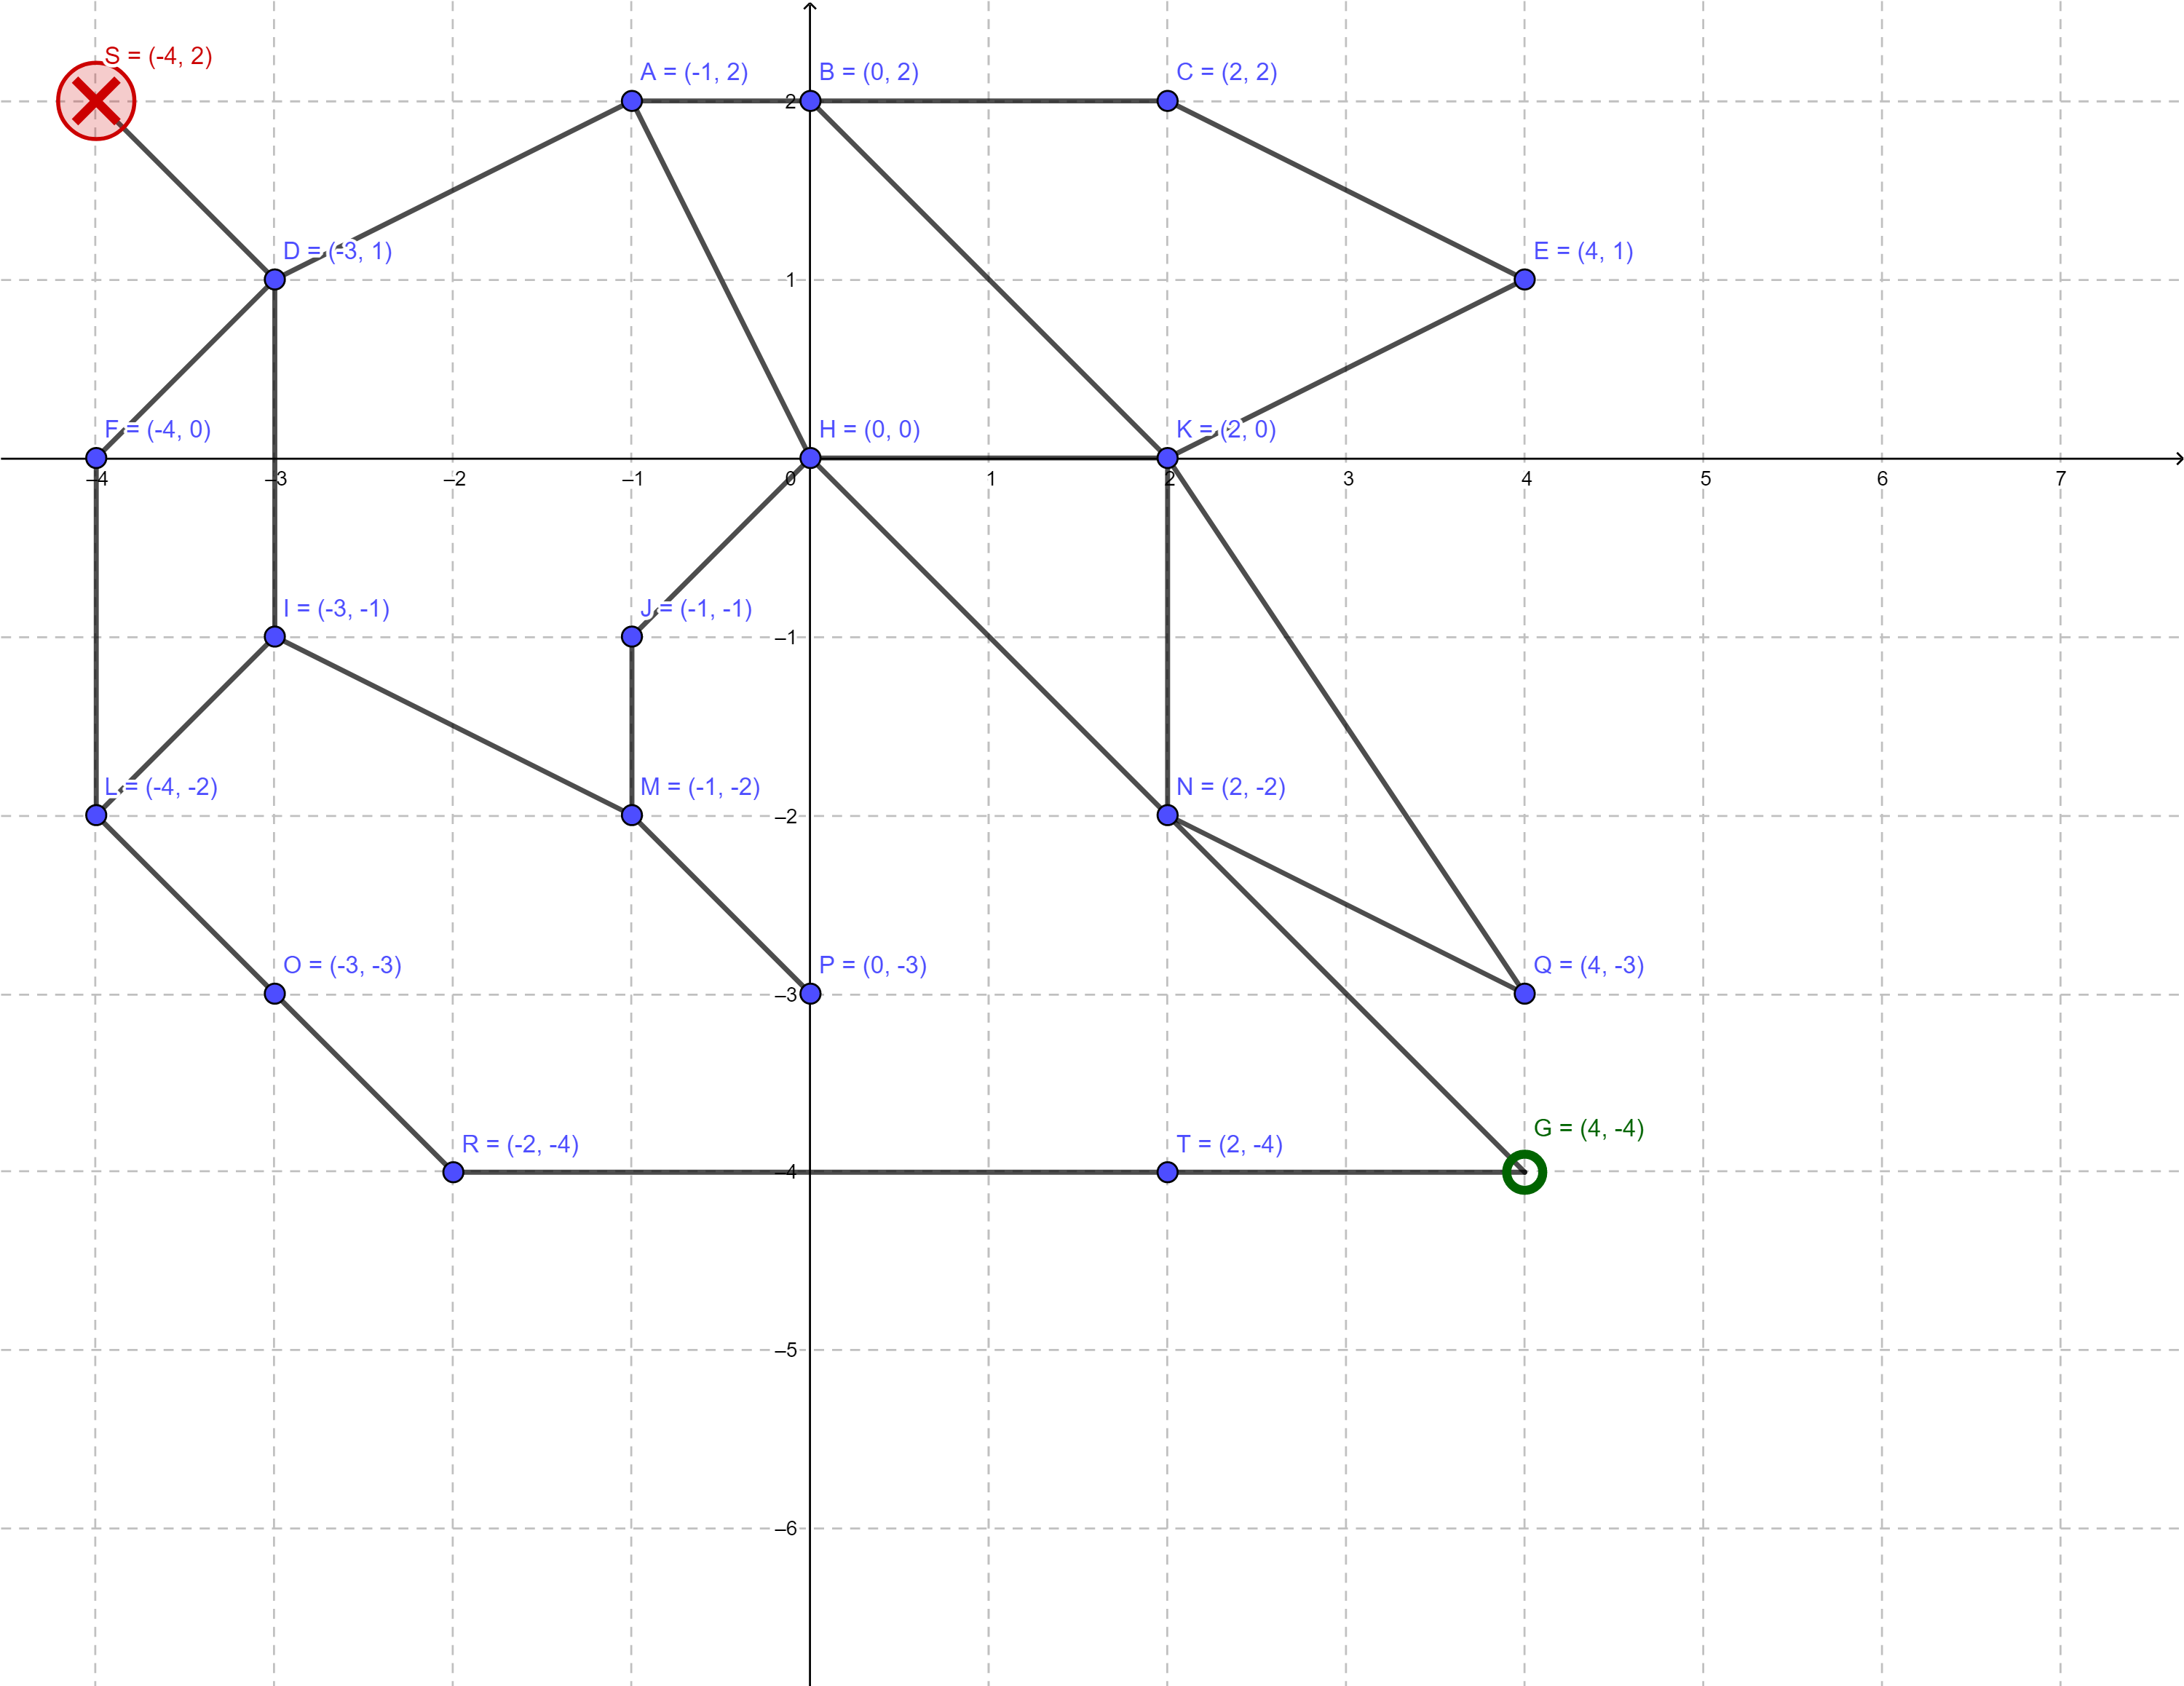

In [66]:
I1 = Image(filename="../../Graphs/Graph_6_ref.png", width=600, height=400)
I2 = Image(filename="../../Graphs/Graph_6_ggb_ref.png", width=800, height=400)
display(I1, I2)

In [67]:
graph = { "S": [["D"], (-4, 2)], 
          "A": [["B", "D"], (-1, 2)], 
          "B": [["A", "C", "K"], (0, 2)], 
          "C": [["B", "E"], (2, 2)], 
          "D": [["A", "F", "I", "S"], (-3, 1)], 
          "E": [["C", "K"], (4, 1)], 
          "F": [["D", "L"], (-4, 0)], 
          "G": [["N", "T"], (4, -4)], 
          "H": [["A", "J", "K", "N"], (0, 0)], 
          "I": [["D", "L", "M"], (-3, -1)], 
          "J": [["H", "M"], (-1, -1)], 
          "K": [["B", "E", "H", "N", "Q"], (2, 0)], 
          "L": [["F", "I", "O"], (-4, -2)], 
          "M": [["I", "J", "P"], (-1, -2)], 
          "N": [["G", "H", "K", "Q"], (2, -2)], 
          "O": [["L", "R"], (-3, -3)], 
          "P": [["M"], (0, -3)], 
          "Q": [["K", "N"], (4, -3)], 
          "R": [["O", "T"], (-2, 4)], 
          "T": [["R", "G"], (2, -4)] 
        }

<p style="font-size: 16px">Case 1: Simple <b>Start (S)</b> to <b>Goal (G)</b> searching</p>

In [68]:
graph_befs(graph, "S", "G")

OPEN:  [('S', 'NIL', 10.0)]
OPEN:  [('D', 'S', 8.602325267042627)]
OPEN:  [('I', 'D', 7.615773105863909), ('A', 'D', 7.810249675906654), ('F', 'D', 8.94427190999916)]
OPEN:  [('M', 'I', 5.385164807134504), ('A', 'D', 7.810249675906654), ('L', 'I', 8.246211251235321), ('F', 'D', 8.94427190999916)]
OPEN:  [('P', 'M', 4.123105625617661), ('J', 'M', 5.830951894845301), ('A', 'D', 7.810249675906654), ('L', 'I', 8.246211251235321), ('F', 'D', 8.94427190999916)]
OPEN:  [('J', 'M', 5.830951894845301), ('A', 'D', 7.810249675906654), ('L', 'I', 8.246211251235321), ('F', 'D', 8.94427190999916)]
OPEN:  [('H', 'J', 5.656854249492381), ('A', 'D', 7.810249675906654), ('L', 'I', 8.246211251235321), ('F', 'D', 8.94427190999916)]
OPEN:  [('N', 'H', 2.8284271247461903), ('K', 'H', 4.47213595499958), ('A', 'D', 7.810249675906654), ('L', 'I', 8.246211251235321), ('F', 'D', 8.94427190999916)]
OPEN:  [('G', 'N', 0.0), ('Q', 'N', 1.0), ('K', 'H', 4.47213595499958), ('A', 'D', 7.810249675906654), ('L', 'I', 8.

<p style="font-weight: 700; font-size: 20px">Beeg Graph - 2</p>

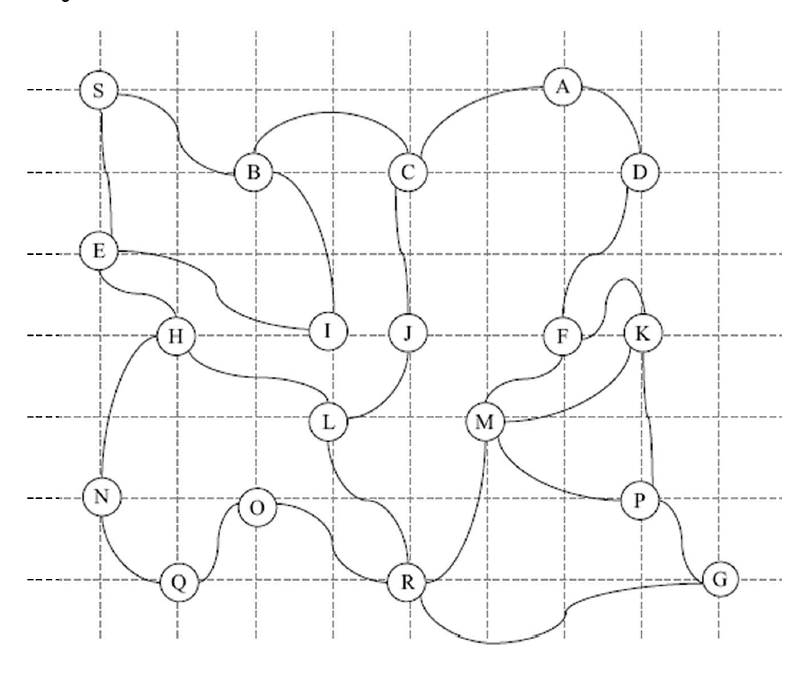

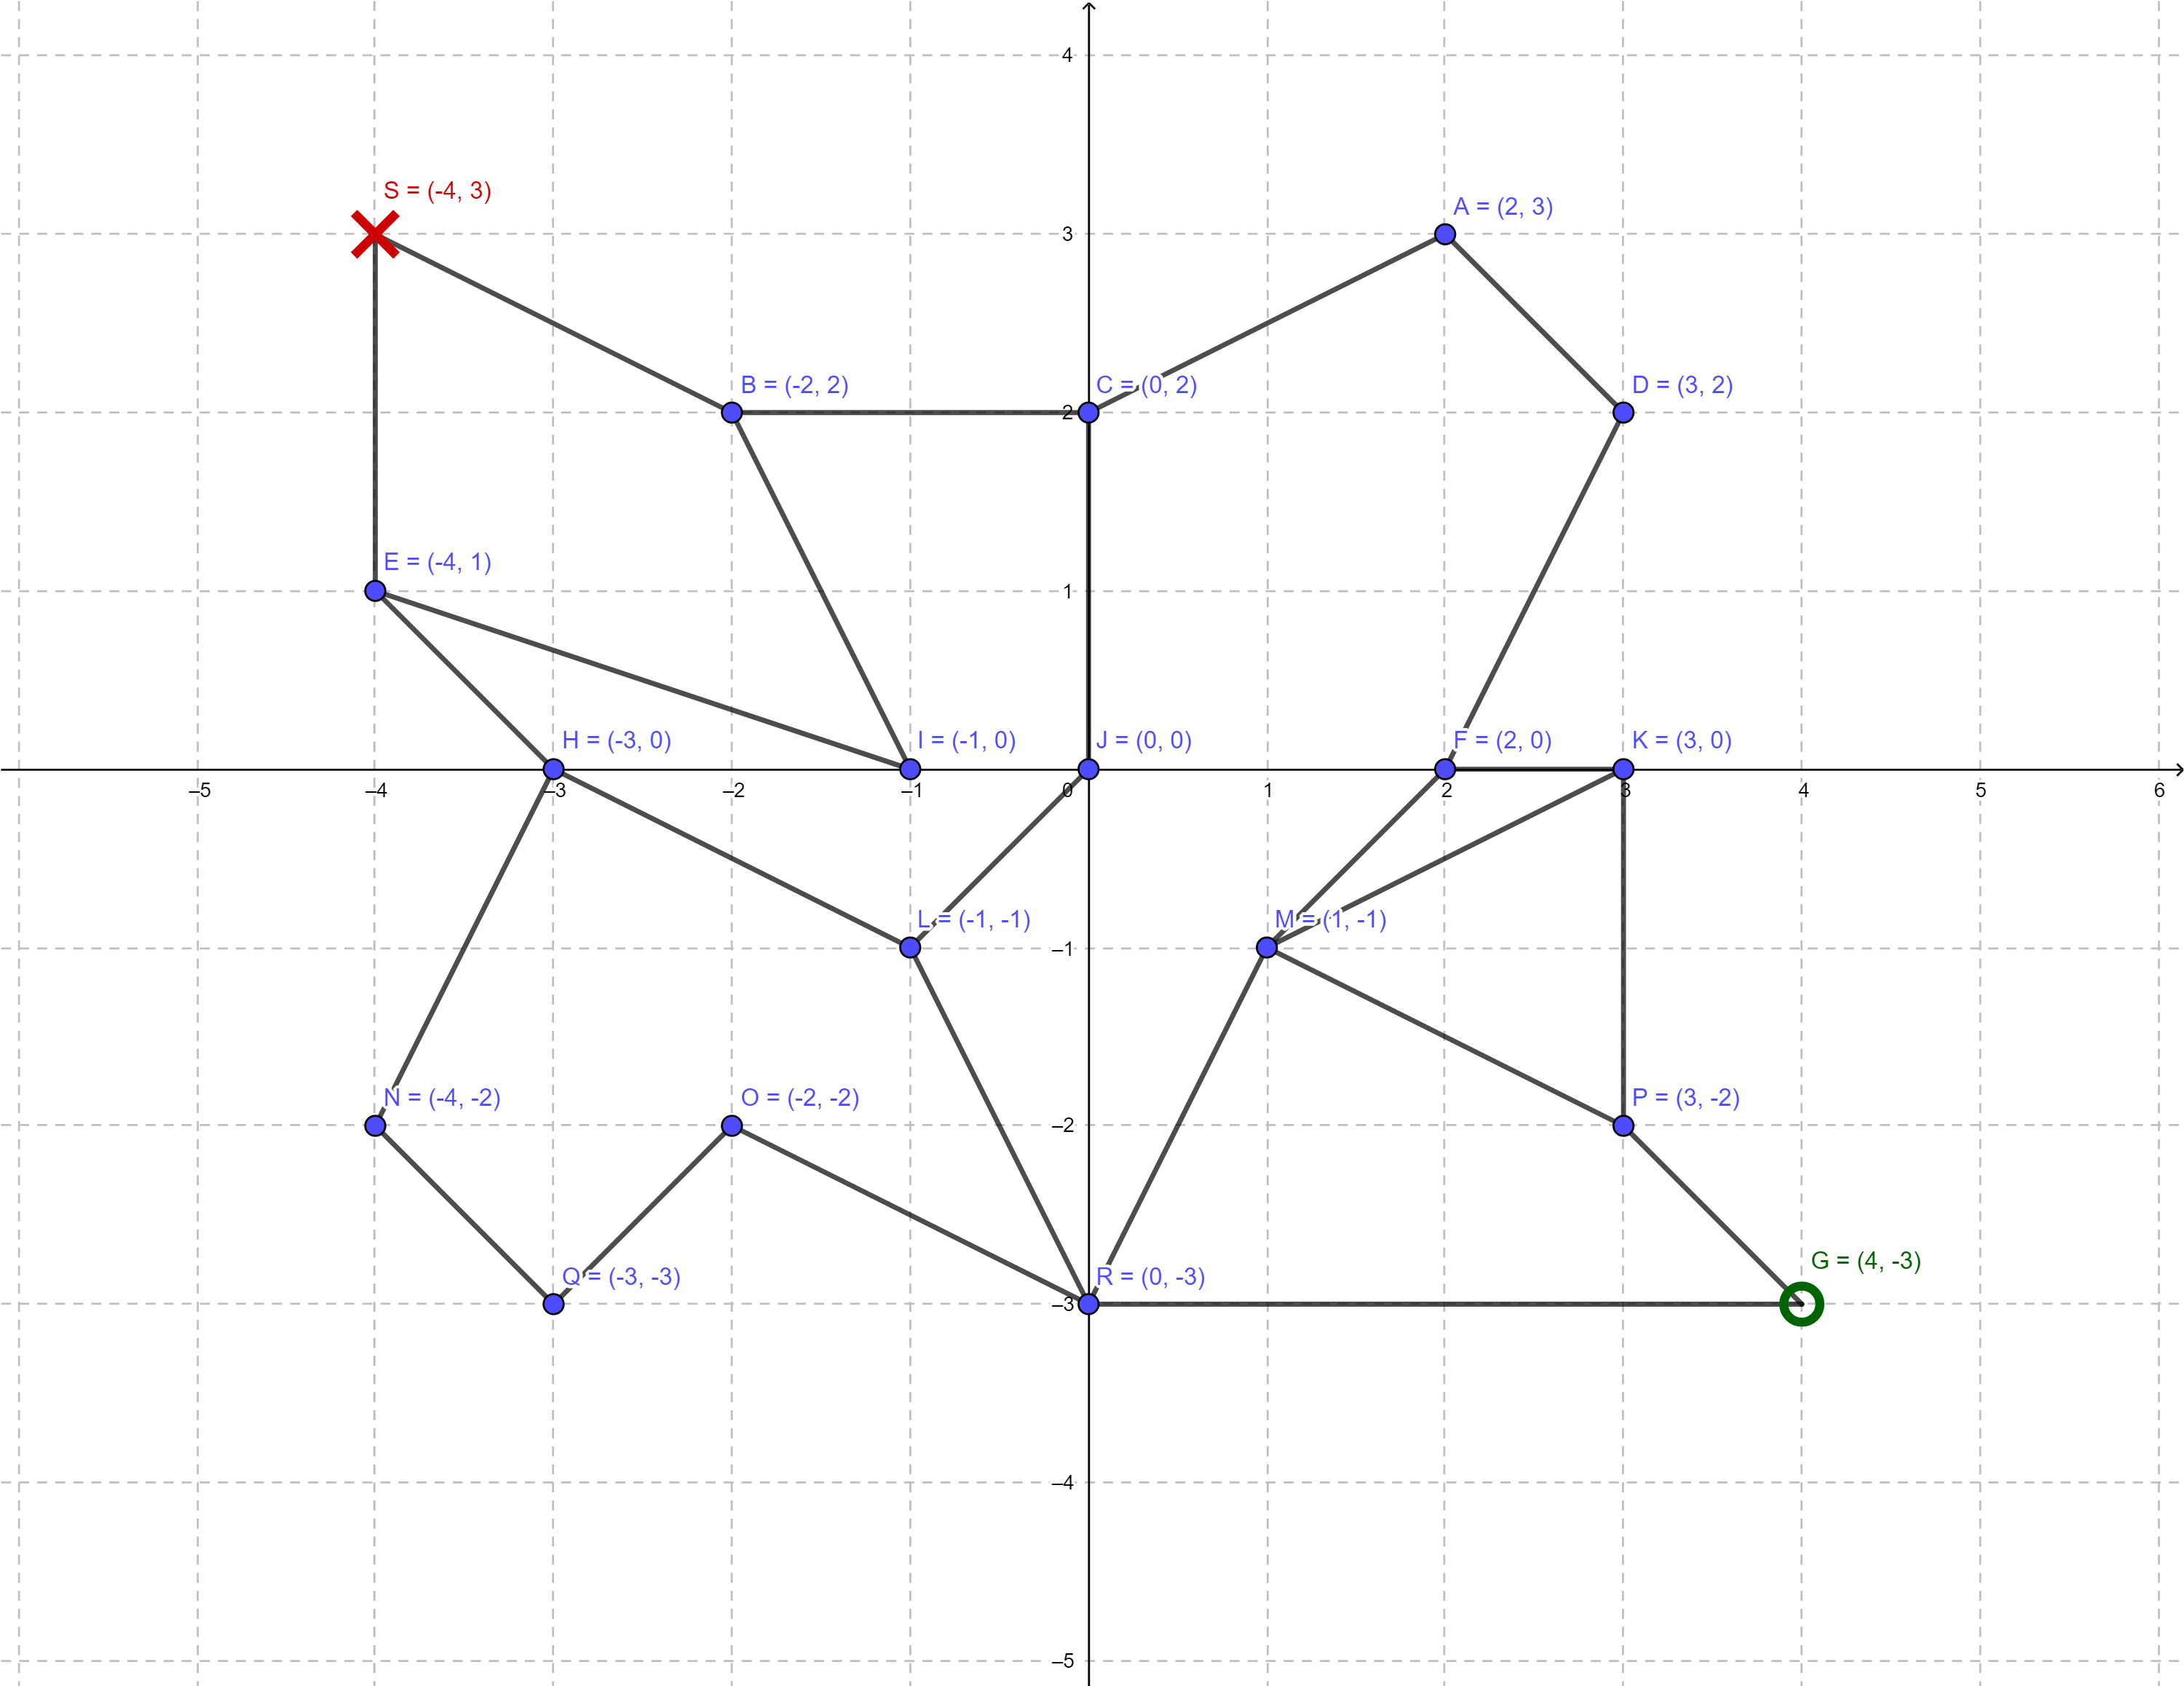

In [69]:
I1 = Image(filename="../../Graphs/Graph_7_ref.png", width=600, height=400)
I2 = Image(filename="../../Graphs/Graph_7_ggb_ref.png", width=800, height=400)
display(I1, I2)

In [70]:
graph = { "S": [["B", "E"], (-4, 3)], 
          "A": [["C", "D"], (2, 3)], 
          "B": [["C", "I", "S"], (-2, 2)], 
          "C": [["A", "B", "J"], (0, 2)], 
          "D": [["A", "F"], (3, 2)], 
          "E": [["I", "H", "S"], (-4, 1)], 
          "F": [["D", "K", "M"], (2, 0)], 
          "G": [["P", "R"], (4, -3)], 
          "H": [["E", "L", "N"], (-3, 0)], 
          "I": [["B", "E"], (-1, 0)], 
          "J": [["C", "L"], (0, 0)], 
          "K": [["F", "M", "P"], (3, 0)], 
          "L": [["H", "J", "R"], (-1, -1)], 
          "M": [["F", "K", "P", "R"], (1, -1)], 
          "N": [["H", "Q"], (-4, -2)], 
          "O": [["Q", "R"], (-2, -2)], 
          "P": [["G", "K", "M"], (3, -2)], 
          "Q": [["N", "O"], (-3, -3)], 
          "R": [["G", "L", "M", "O"], (0, -3)] 
        }

<p style="font-size: 16px">Case 1: Simple <b>Start (S)</b> to <b>Goal (G)</b> searching</p>

In [71]:
graph_befs(graph, "S", "G")

OPEN:  [('S', 'NIL', 10.0)]
OPEN:  [('B', 'S', 7.810249675906654), ('E', 'S', 8.94427190999916)]
OPEN:  [('I', 'B', 5.830951894845301), ('C', 'B', 6.4031242374328485), ('E', 'S', 8.94427190999916)]
OPEN:  [('C', 'B', 6.4031242374328485), ('E', 'S', 8.94427190999916)]
OPEN:  [('J', 'C', 5.0), ('A', 'C', 6.324555320336759), ('E', 'S', 8.94427190999916)]
OPEN:  [('L', 'J', 5.385164807134504), ('A', 'C', 6.324555320336759), ('E', 'S', 8.94427190999916)]
OPEN:  [('R', 'L', 4.0), ('A', 'C', 6.324555320336759), ('H', 'L', 7.615773105863909), ('E', 'S', 8.94427190999916)]
OPEN:  [('G', 'R', 0.0), ('M', 'R', 3.605551275463989), ('O', 'R', 6.082762530298219), ('A', 'C', 6.324555320336759), ('H', 'L', 7.615773105863909), ('E', 'S', 8.94427190999916)]
Path from Source to Goal: S -> B -> C -> J -> L -> R -> G
